<a href="https://colab.research.google.com/github/Gus-1003/DataScience-Minhas_Praticas/blob/main/Analise_Dataset_Avalia%C3%A7%C3%A3o_restaurante/Analise_Dataset_Avalia%C3%A7%C3%A3o_restaurante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto:

## Para deixar claro:


Esta será a minha primeira experiência na aplicação de conhecimentos e técnicas de análise multivariada. Caso você, que está lendo, identifique algum erro ou tenha alguma sugestão, por favor, entre em contato comigo pelo e-mail: gm88605363@gmail.com.

A análise multivariada é um conjunto de técnicas estatísticas que lidam com a análise simultânea de múltiplas variáveis ​​para obter uma melhor compreensão dos dados. As etapas comuns para uma análise multivariada incluem:

> **Coleta e preparação dos dados:** Esta etapa envolve a coleta de dados relevantes e a preparação desses dados para análise, incluindo a identificação e tratamento de dados ausentes, valores discrepantes, erros e outras anomalias.

> **Seleção de variáveis:** A seleção de variáveis ​​adequadas é essencial para garantir que a análise multivariada seja efetiva e relevante. Isso envolve identificar as variáveis ​​que são mais importantes para o problema em questão e descartar as variáveis ​​que não são relevantes.

> **Análise exploratória de dados:** A análise exploratória de dados é realizada para examinar a distribuição, a relação e a estrutura dos dados. As técnicas comuns para análise exploratória de dados incluem tabelas de frequência, histogramas, gráficos de dispersão, boxplots, matriz de correlação, entre outros.

> **Seleção de método de análise:** A seleção do método de análise apropriado é fundamental para a análise multivariada. Alguns dos métodos mais comuns são análise de componentes principais, análise fatorial, análise discriminante, regressão múltipla, análise de cluster, entre outros.

> **Interpretação dos resultados:** A interpretação dos resultados da análise multivariada é a etapa final. Nesta etapa, os resultados são interpretados para identificar as principais conclusões e padrões nos dados, bem como as implicações para a tomada de decisões. A interpretação pode incluir a visualização dos dados, como gráficos e mapas, para tornar os resultados mais claros e fáceis de entender.

# Importando Bibliotecas:


In [1]:
# Numpy é uma biblioteca para realizar operações matemáticas com arrays e matrizes multidimensionais.
import numpy as np

'''O Pandas consegue manipular e analisar de dados em Python. Ele oferece estruturas de dados e 
ferramentas para trabalhar com dados tabulares e séries temporais.'''
import pandas as pd

'''matplotlib.pyplot, biblioteca de visualização de dados em Python. Ele permite a criação de 
gráficos 2D de alta qualidade, como gráficos de linha, gráficos de barras, gráficos de dispersão e muito mais.'''
import matplotlib.pyplot as plt

'''seaborn é usada para visualização de dados estatísticos em Python. Ele fornece uma 
interface de alto nível para criar gráficos estatísticos atraentes e informativos.'''
import seaborn as sns

# Lendo arquivo:

In [2]:
dados = "https://raw.githubusercontent.com/Gus-1003/DataScience-Minhas_Praticas/main/Analise_Dataset_Avalia%C3%A7%C3%A3o_restaurante/Restaurante.csv"
df = pd.read_csv(dados, delimiter=",", quotechar='"')

# Preparando os Dados:

## Visualização:

In [3]:
# exibe o dataframe
df

,AVALIAÇÃO 1,AVALIAÇÃO 2,AVALIAÇÃO 3,Situação
0,"9,69","22,91","2,36",Fidelizado
1,"5,54","28,64","5,17",Fidelizado
2,??,"22,91",??,Fidelizado
3,"12,46","40,09","3,22",Fidelizado
4,"11,07","17,18","1,55",Fidelizado
5,"8,30",57.27,"6,90",Fidelizado
6,"2,77","34,36","12,41",Não fidelizado
7,"5,54",17.18,"6,01",Não fidelizado
8,??,"11,45",??,Não fidelizado
9,"8,30",??,??,Não fidelizado


In [4]:
# substituindo as vírgulas por pontos em todas as colunas
df = df.replace(",", ".", regex=True)

In [5]:
# Substituindo os valores ausentes por NaN
df = df.replace("??", np.nan)

# Convertendo as colunas de avaliação para valores float
df[["AVALIAÇÃO 1", "AVALIAÇÃO 2", "AVALIAÇÃO 3"]] = df[["AVALIAÇÃO 1", "AVALIAÇÃO 2", "AVALIAÇÃO 3"]].astype(float)

df.rename(columns={"AVALIAÇÃO 1": "Nota 1", "AVALIAÇÃO 2": 'Nota 2', "AVALIAÇÃO 3": "Nota 3"}, inplace=True)

In [6]:
df = df[df["Nota 2"] < 23].reset_index(drop=True)
df

,Nota 1,Nota 2,Nota 3,Situação
0,9.69,22.91,2.36,Fidelizado
1,NaN,22.91,NaN,Fidelizado
2,11.07,17.18,1.55,Fidelizado
3,5.54,17.18,6.01,Não fidelizado
4,NaN,11.45,NaN,Não fidelizado
5,6.92,5.73,4.88,Não fidelizado
6,13.84,11.45,0.83,Não fidelizado


## Visão Estatística:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nota 1    5 non-null      float64
 1   Nota 2    7 non-null      float64
 2   Nota 3    5 non-null      float64
 3   Situação  7 non-null      object 
dtypes: float64(3), object(1)
memory usage: 352.0+ bytes


In [8]:
df.describe()

,Nota 1,Nota 2,Nota 3
count,5.000000,7.000000,5.000000
mean,9.412000,15.544286,3.126000
std,3.302873,6.373188,2.221268
min,5.540000,5.730000,0.830000
25%,6.920000,11.450000,1.550000
50%,9.690000,17.180000,2.360000
75%,11.070000,20.045000,4.880000
max,13.840000,22.910000,6.010000


In [9]:
df.describe(include="object")

,Situação
count,7
unique,2
top,Não fidelizado
freq,4


## Tratamento dos Dados:

In [10]:
# Esse código retorna a contagem de valores nulos em cada coluna do DataFrame dados, ordenando do menor para o maior número de valores nulos.
df.isna().sum().sort_values(ascending=False)

Nota 1      2
Nota 3      2
Nota 2      0
Situação    0
dtype: int64

In [11]:
# substituindo os valores faltantes pela média de cada coluna
df = df.fillna(df.mean())

<ipython-input-11-78535052bb2d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [12]:
df

,Nota 1,Nota 2,Nota 3,Situação
0,9.690,22.91,2.360,Fidelizado
1,9.412,22.91,3.126,Fidelizado
2,11.070,17.18,1.550,Fidelizado
3,5.540,17.18,6.010,Não fidelizado
4,9.412,11.45,3.126,Não fidelizado
5,6.920,5.73,4.880,Não fidelizado
6,13.840,11.45,0.830,Não fidelizado


## Identificando a coluna Alvo: 
(Dependente da Relação entre os outros atributos)

In [13]:
df['Situação'] = df['Situação'].replace({'Fidelizado': 1, 'Não fidelizado': 0})

In [14]:
# Analisando o Balance
Fiel, esporadico = df["Situação"].value_counts()

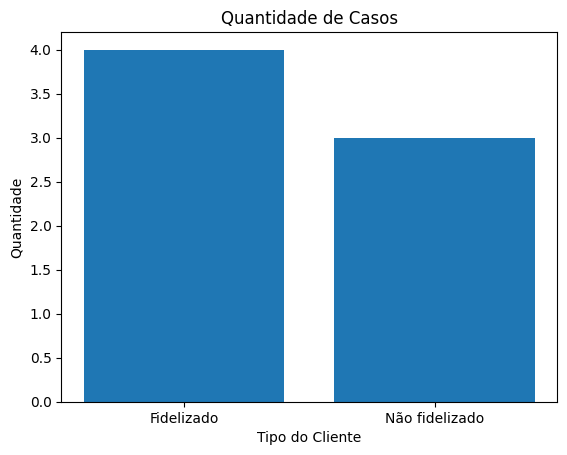

In [15]:
# Mostrando graficamente a diferença entre tipos de um mesmo atributo:

# Dados de exemplo
valores = ['Fidelizado', 'Não fidelizado']
contagem = [Fiel, esporadico]

# Configuração do gráfico de barras
plt.bar(valores, contagem)
plt.title('Quantidade de Casos')
plt.xlabel('Tipo do Cliente')
plt.ylabel('Quantidade')

# Exibição do gráfico
plt.show()

# Explorando os Dados:

## Verificando Escalas:

### Boxplot:

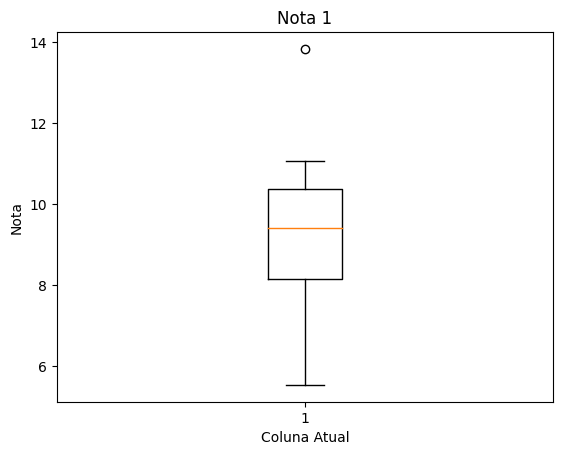

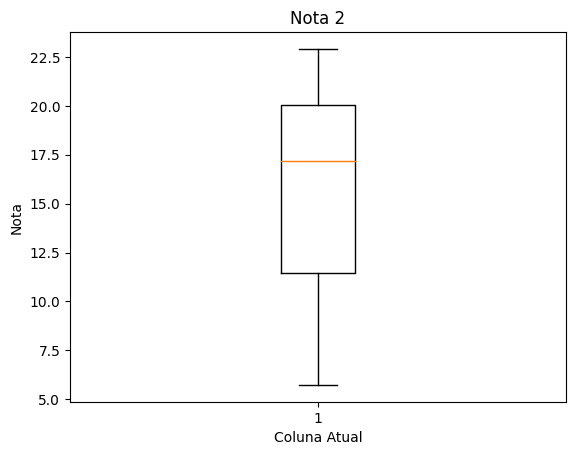

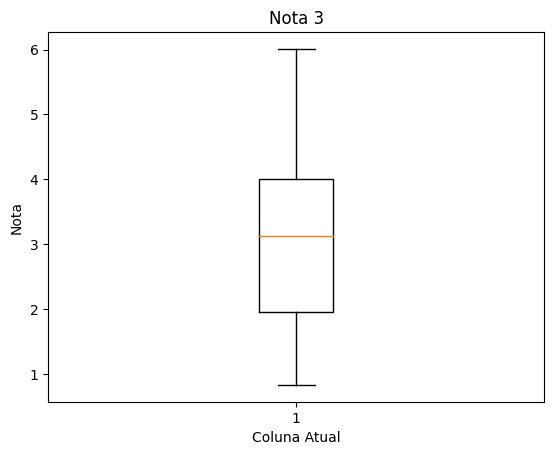

In [16]:
# Plotando o boxplot para cada coluna
for coluna in df.columns[:3]:
  plt.figure()
  plt.boxplot(df[coluna])
  plt.title(f'{coluna}')
  plt.xlabel('Coluna Atual')
  plt.ylabel('Nota')

# Exibição dos gráficos
plt.show()

In [17]:
df

,Nota 1,Nota 2,Nota 3,Situação
0,9.690,22.91,2.360,1
1,9.412,22.91,3.126,1
2,11.070,17.18,1.550,1
3,5.540,17.18,6.010,0
4,9.412,11.45,3.126,0
5,6.920,5.73,4.880,0
6,13.840,11.45,0.830,0


### Histograma:

array([[<Axes: title={'center': 'Nota 1'}>,
        <Axes: title={'center': 'Nota 2'}>],
       [<Axes: title={'center': 'Nota 3'}>,
        <Axes: title={'center': 'Situação'}>]], dtype=object)

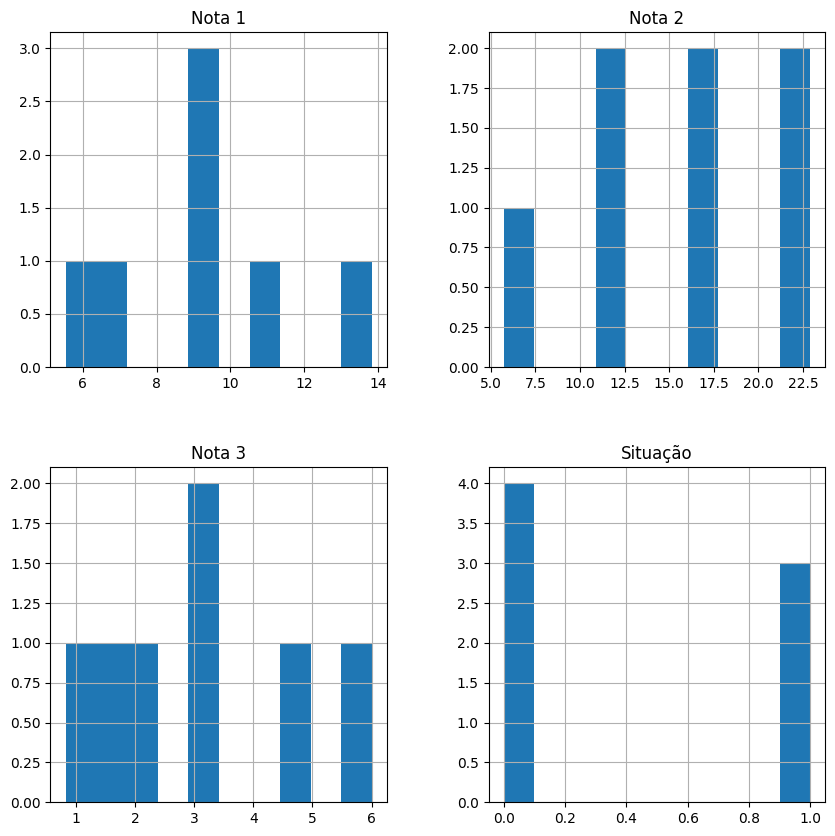

In [18]:
df.hist(figsize=(10,10))

## Selecionando Variáveis

Existem diversas técnicas para identificar as variáveis mais relevantes em uma análise multivariada, sendo as mais comuns:

> **Análise de componentes principais (PCA):** técnica que busca reduzir a dimensionalidade do conjunto de dados, identificando quais variáveis têm maior contribuição para a variabilidade dos dados;

> **Análise de correlação:** verificação da relação entre as variáveis através do coeficiente de correlação, podendo identificar variáveis que estão altamente correlacionadas e, portanto, podem ser redundantes;

> **Análise de regressão:** verificação da contribuição de cada variável na explicação da variabilidade do modelo, permitindo identificar aquelas com maior impacto na resposta.

Além disso, outras técnicas de seleção de variáveis também podem ser utilizadas, como análise discriminante, árvores de decisão, redes neurais, entre outras. A escolha da técnica mais adequada depende do objetivo da análise e das características dos dados em questão.

### Importando Biblioteca:

In [19]:
from sklearn.decomposition import PCA

No algoritmo abaixo, a biblioteca sklearn é utilizada para criar o objeto PCA e aplicá-lo nos dados normalizados. Em seguida, são obtidas as componentes principais e a variação explicada por cada uma delas. A partir dessa análise, é possível identificar as variáveis mais relevantes para o modelo.


### Checando o Dataset:

In [20]:
df

,Nota 1,Nota 2,Nota 3,Situação
0,9.690,22.91,2.360,1
1,9.412,22.91,3.126,1
2,11.070,17.18,1.550,1
3,5.540,17.18,6.010,0
4,9.412,11.45,3.126,0
5,6.920,5.73,4.880,0
6,13.840,11.45,0.830,0


### PCA

O PCA (Principal Component Analysis) é uma técnica de redução de dimensionalidade que visa identificar as direções (componentes principais) em que os dados apresentam a maior variância e, então, projetar os dados em um espaço dimensional menor, mantendo a maior parte das informações relevantes.

No caso de um dataset de câncer de mama com 569 amostras e 31 atributos, o PCA poderia ser implementado da seguinte forma em Python:

In [21]:
# Aplicação de um Algoritmo de PCA:

# Normalizar os dados
df_normal = (df - df.mean()) / df.std()

# Criar o objeto PCA
pca = PCA()

# Aplicar o PCA nos dados normalizados
pca.fit(df_normal)

# Obter as componentes principais
componentes_principais = pca.components_

# Obter a variação explicada por cada componente principal
var_explicada = pca.explained_variance_ratio_

# Imprimir as componentes principais e a variação explicada por cada uma
for i, componente in enumerate(componentes_principais):
    print('Analise da coluna ' + df_normal.columns[i] + ':', var_explicada[i])
    print()

Analise da coluna Nota 1: 0.5823368376180075

Analise da coluna Nota 2: 0.37047616685002016

Analise da coluna Nota 3: 0.045239477268491285

Analise da coluna Situação: 0.0019475182634810843



### Análise de correlação::

A análise de correlação é uma técnica estatística que permite avaliar a relação entre duas ou mais variáveis. A correlação pode ser positiva, negativa ou neutra, dependendo da direção e força da relação entre as variáveis.

A correlação positiva indica que há uma relação direta entre as variáveis, ou seja, quando uma aumenta, a outra também aumenta. Já a correlação negativa indica que há uma relação inversa entre as variáveis, ou seja, quando uma aumenta, a outra diminui. A correlação neutra indica que não há relação entre as variáveis.

Uma das medidas mais comuns para avaliar a correlação entre duas variáveis é o coeficiente de correlação de Pearson, que varia entre -1 e 1. Um valor de -1 indica correlação negativa perfeita, 0 indica ausência de correlação e 1 indica correlação positiva perfeita.

Para realizar uma análise de correlação, podemos utilizar ferramentas estatísticas como a matriz de correlação, que mostra a correlação entre todas as variáveis de um conjunto de dados, ou gráficos de dispersão, que permitem visualizar a relação entre duas variáveis. Também é possível utilizar técnicas mais avançadas, como a análise de regressão, que permite avaliar a relação entre uma variável dependente e uma ou mais variáveis independentes.

Em resumo, a análise de correlação é uma ferramenta importante na análise de dados, permitindo avaliar a relação entre as variáveis e identificar padrões e tendências nos dados.

***Especifico:***

In [22]:
# Calcula a correlação de Pearson de todas as colunas com a coluna diagnosis
correlation = df.corr()['Situação'].sort_values(ascending=False)

# Exibe a correlação em ordem crescente
print(correlation)

Situação    1.000000
Nota 2      0.800754
Nota 1      0.223842
Nota 3     -0.402638
Name: Situação, dtype: float64


***Especifico:***

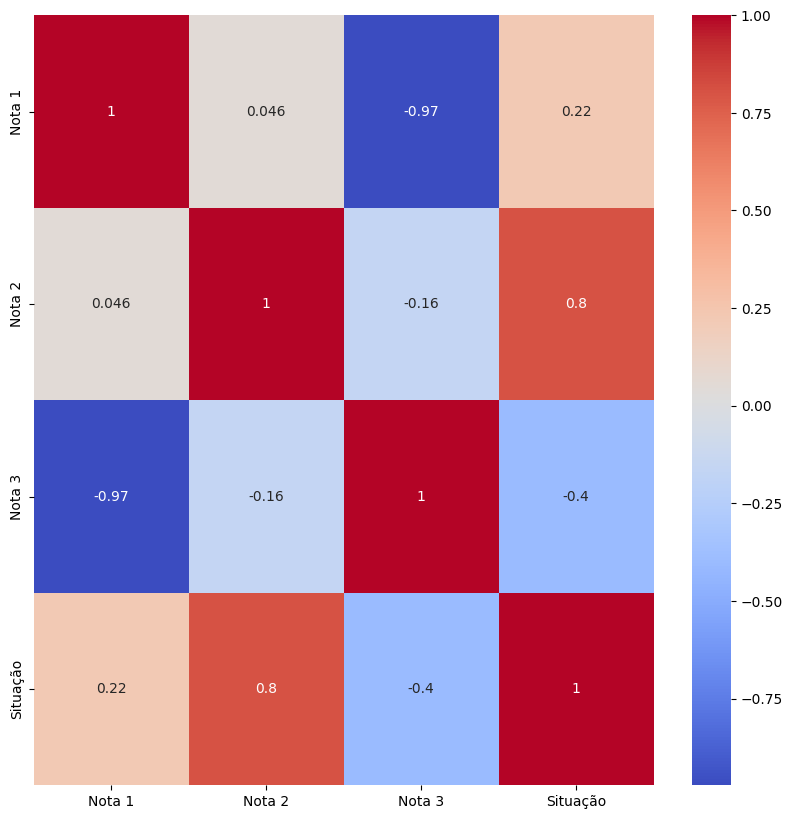

In [23]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 10))

# Criando um mapa de calor da matriz de correlação
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

plt.show()

In [24]:
df

,Nota 1,Nota 2,Nota 3,Situação
0,9.690,22.91,2.360,1
1,9.412,22.91,3.126,1
2,11.070,17.18,1.550,1
3,5.540,17.18,6.010,0
4,9.412,11.45,3.126,0
5,6.920,5.73,4.880,0
6,13.840,11.45,0.830,0
